In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline
data = pd.read_csv("adult.csv")

In [2]:
#Tamaño del conjunto de datos
data.shape  #tenemos 32561 filas y 15 columnas

(32561, 15)

In [4]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Para iniciar el modelo, realziamos un cambio "?" por nan, y luego elimino los nan, mi dataset es data_limpia

In [35]:
data_temp = data[data != '?']
data_limpia = data_temp.dropna()
data_limpia.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [36]:
data_limpia.shape  #Cuantos quedan luego de eliminar

(30162, 15)

Se reduce la categoria en el atributo marital.status, para un mejor modelo se va agrupar en solteros y casados, Married y Never-Married

In [14]:
data["marital.status"].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], dtype=object)

In [38]:
data_limpia.loc[data_limpia["marital.status"]=="Widowed", "marital.status"]="Married"
data_limpia.loc[data_limpia["marital.status"]=="Divorced","marital.status"]="Married"
data_limpia.loc[data_limpia["marital.status"]=="Separated","marital.status"]="Married"
data_limpia.loc[data_limpia["marital.status"]=="Married-civ-spouse","marital.status"]="Married"
data_limpia.loc[data_limpia["marital.status"]=="Married-spouse-absent","marital.status"]="Married"
data_limpia.loc[data_limpia["marital.status"]=="Married-AF-spouse","marital.status"]="Married"
data_limpia.head()

C:\Users\Ferdinand\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Married,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Married,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Married,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Married,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Married,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [41]:
data_limpia["marital.status"].unique()

array(['Married', 'Never-married'], dtype=object)

# Exploracion de datos
### Analizamos la clase income

In [43]:
data_limpia["income"].value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

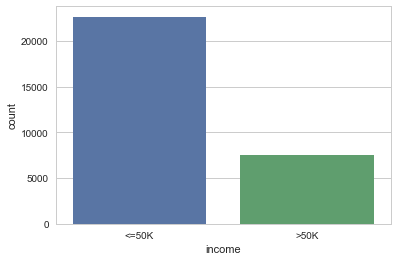

In [46]:
sns.countplot(x=data_limpia["income"] )
plt.show()

In [48]:
#Calculo de la media de income con los atributos numericos
data_limpia.groupby(data_limpia["income"]).mean()
#se observa que capital.gain y capital.loss tienen mucha diferencia, en menor medida la age(edad) y horas
#por semana (hours.per.week)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
income,,,,,,
<=50K,36.60806,190338.646729,9.629116,148.893838,53.448000,39.348592
>50K,43.95911,188149.962174,11.606420,3937.679808,193.750666,45.706580


Calculamos los atributos categoricos, respecto a los numericos, se puede realizar uno por uno

In [49]:
data_limpia.groupby("workclass").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
workclass,,,,,,
Federal-gov,42.577943,185717.107105,10.948038,832.321315,111.731707,41.279958
Local-gov,41.743106,188422.886309,11.036768,829.230285,110.323174,41.002419
Private,36.794355,192719.985776,9.871085,879.858207,79.629498,40.250875
Self-emp-inc,46.027933,175775.219739,11.167598,4810.746741,153.504655,48.802607
Self-emp-not-inc,45.011605,175222.506603,10.211285,1913.134454,115.572229,44.432173
State-gov,39.362002,184440.424550,11.349492,684.306489,81.147772,39.053948
Without-pay,47.785714,174267.500000,9.071429,487.857143,0.000000,32.714286


In [51]:
data_limpia.groupby("education").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
education,,,,,,
10th,37.897561,196969.587805,6.0,395.914634,62.268293,37.464634
11th,32.363550,193269.800573,7.0,217.190840,52.538168,34.193702
12th,32.013263,200397.411141,8.0,265.501326,32.891247,35.697613
1st-4th,44.622517,245258.609272,2.0,113.940397,53.768212,38.377483
5th-6th,41.649306,235891.625000,3.0,170.038194,71.524306,38.798611
7th-8th,47.631957,190912.093357,4.0,244.703770,66.229803,40.131059
9th,40.303297,204487.019780,5.0,354.298901,28.980220,38.767033
Assoc-acdm,37.286706,192816.142857,12.0,554.921627,94.377976,41.184524
Assoc-voc,38.246366,181140.203520,11.0,737.344300,70.198929,41.954093


In [52]:
data_limpia.groupby("marital.status").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
marital.status,,,,,,
Married,43.185946,186981.619886,10.174349,1429.045214,105.597328,42.689959
Never-married,28.461444,195702.779663,10.009870,383.834362,52.180136,37.235863


In [53]:
data_limpia.groupby("occupation").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
occupation,,,,,,
Adm-clerical,37.004569,191949.896264,10.108035,497.097286,59.987638,37.561408
Armed-Forces,30.222222,215425.888889,10.111111,0.000000,209.666667,40.666667
Craft-repair,38.976675,192298.204963,9.117866,657.586849,86.510918,42.298015
Exec-managerial,42.183116,184496.540331,11.438878,2185.330912,139.224198,44.966934
Farming-fishing,41.251769,170381.319515,8.614762,592.707786,63.394338,46.990900
Handlers-cleaners,32.114815,203602.637778,8.495556,258.140000,44.220000,37.874815
Machine-op-inspct,37.693795,195200.527976,8.475585,323.825025,58.526450,40.707019
Other-service,34.905978,188434.666252,8.778643,181.705479,36.874222,34.605542
Priv-house-serv,42.034965,200711.699301,7.223776,291.594406,22.349650,32.797203


In [54]:
data_limpia.groupby("race").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
race,,,,,,
Amer-Indian-Eskimo,36.737762,123491.944056,9.356643,660.290210,37.164336,40.426573
Asian-Pac-Islander,37.910615,159337.400000,11.025698,1304.375419,91.683799,40.500559
Black,37.860845,228807.455449,9.530706,604.722045,56.267661,38.674476
Other,33.601732,195772.238095,8.683983,1060.653680,50.294372,40.112554
White,38.580612,187285.002159,10.175491,1142.651024,92.649558,41.204103


In [55]:
data_limpia.groupby("sex").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
sex,,,,,,
Female,36.883459,185926.150480,10.098651,570.176753,60.938765,36.932222
Male,39.184004,191650.246075,10.132188,1342.476546,101.540137,42.850687


In [56]:
data_limpia.groupby("native.country").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
native.country,,,,,,
Cambodia,38.888889,189291.722222,8.722222,1084.944444,104.222222,40.944444
Canada,41.514019,181268.224299,10.672897,1614.560748,146.934579,41.476636
China,42.235294,178793.720588,11.235294,404.205882,198.000000,38.647059
Columbia,39.339286,227963.910714,9.446429,190.285714,28.607143,39.642857
Cuba,45.532609,248063.880435,9.695652,379.206522,72.326087,39.728261
Dominican-Republic,37.432836,193123.044776,7.089552,1542.149254,26.298507,42.283582
Ecuador,36.444444,186532.185185,9.555556,547.148148,0.000000,40.222222
El-Salvador,34.720000,254135.100000,6.880000,608.780000,15.790000,37.000000
England,41.255814,183293.767442,11.127907,904.941860,86.604651,42.476744
